In [1]:
#Importaremos las bibliotecas a utilizar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Tomaremos el URL de nuestra base de datos de la estacion climatologica 3042 ubicada en el municipio de la paz
# En el estado de Baja califormia Sur 

url ="https://raw.githubusercontent.com/Aglaeth/fisica_computacional/main/Actividad5/3042.txt"

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python'

my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']

df_pocitas = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=2, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_poc = df_pocitas.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_pocja = df_poc.replace(to_replace=str_Nulo, value='', regex=True)
# df_c.head()

# Vamos a convertir nuestros datos correspondientes a la estacion 3042 para poder trabajar con ellos
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_pocja[cols] = pd.to_numeric(df_pocja[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_copia = df_pocja.copy()

# Ahora asignamos el formato fecha a nuestro trabajo 
df_copia['Fecha']=pd.to_datetime(df_copia['Fecha'], dayfirst=True).copy()


# Añadimos las columnas de año y mes ademas de la de fecha
df_copia["Año"] = df_copia["Fecha"].dt.year
df_copia["Mes"] = df_copia["Fecha"].dt.month

# definimos 
df_met = df_copia.copy()
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22960 entries, 0 to 22959
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   22960 non-null  datetime64[ns]
 1   Precip  22949 non-null  float64       
 2   Evap    0 non-null      float64       
 3   TMax    22899 non-null  float64       
 4   TMin    22838 non-null  float64       
 5   Año     22960 non-null  int64         
 6   Mes     22960 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB


*** Empezamos creando una serie de tiempo***

In [4]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_met_pocitas = df_met.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_met_pocitas = df_met_pocitas.set_index('Fecha')

# Verificamos con ayuda del comando .info()
df_met_pocitas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22960 entries, 1952-09-01 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  22949 non-null  float64
 1   Evap    0 non-null      float64
 2   TMax    22899 non-null  float64
 3   TMin    22838 non-null  float64
 4   Año     22960 non-null  int64  
 5   Mes     22960 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.2 MB


In [5]:
print(df_met_pocitas.head())
print(df_met_pocitas.tail())

            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
1952-09-01     0.0   NaN  37.0  21.0  1952    9
1952-09-02     0.0   NaN  36.0  22.0  1952    9
1952-09-03     0.0   NaN  34.0  23.0  1952    9
1952-09-04     0.0   NaN  33.0  24.0  1952    9
1952-09-05     0.0   NaN  38.0  22.0  1952    9
            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
2017-12-25     0.0   NaN  21.0  15.0  2017   12
2017-12-26     0.0   NaN  22.0  14.0  2017   12
2017-12-27     0.0   NaN  27.0  13.0  2017   12
2017-12-28     0.0   NaN  25.0  15.0  2017   12
2017-12-29     0.0   NaN  27.0  12.0  2017   12


In [6]:
# Seleccionaremos un conjunto de años de 31 años
df_32 = df_met_pocitas[(df_met_pocitas['Año'] >= 1952) & (df_met_pocitas['Año'] < 1984)]
df_33 = df_met_pocitas[(df_met_pocitas['Año'] >= 1984) & (df_met_pocitas['Año'] < 2017)]


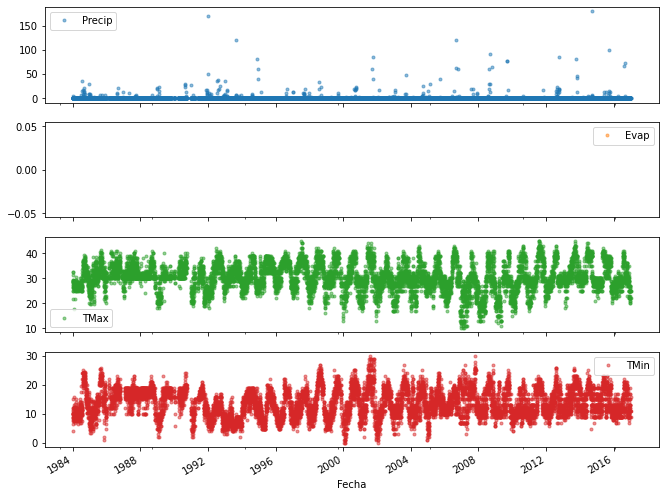

In [7]:
# Podemos visualizar la colección de los últimos 33 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'TMax', 'TMin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'TMax ºC', 'TMin (ºC)']
axes = df_33[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)

***ACTIVIDAD 1*** 

In [ ]:
#Explora tus datos de Precipitación los últimos años 1990- fin de datos.

#Grafica todo el rango de datos utilizando la función df.plot()

#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.

#Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

Variación en Precipitación promedio 1984-2017 : 0.3725756910925845


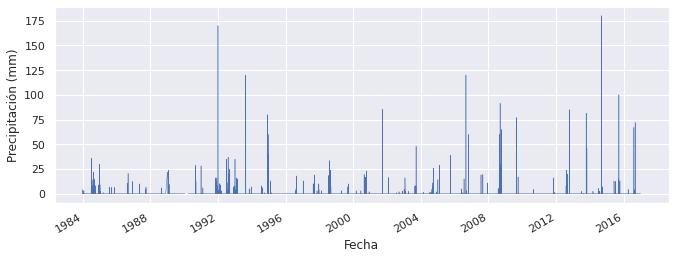

In [8]:
# Graficamos la Precipitación de los últimos 33 años (1984 hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_32 = df_32.Precip.mean()
Precip_ave_33 = df_33.Precip.mean()

df_33['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');


print('Variación en Precipitación promedio 1984-2017 :', Precip_ave_33)

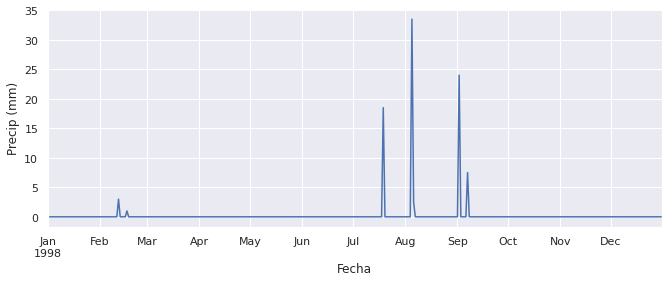

In [9]:
#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 

ax = df_33.loc['1998', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

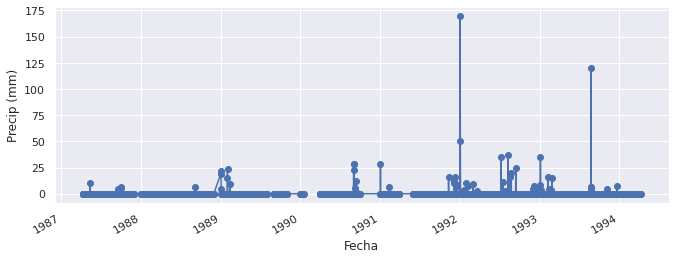

In [11]:
# Investigando un periodo de datos
ax = df_33.loc['1987-04-09':'1994-04-09', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

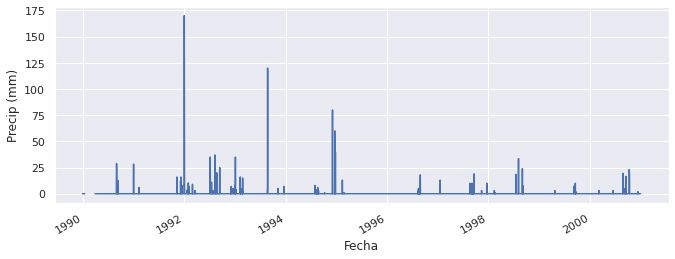

In [12]:
# Investigando un rango de datos
ax = df_33.loc['1990':'2000', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

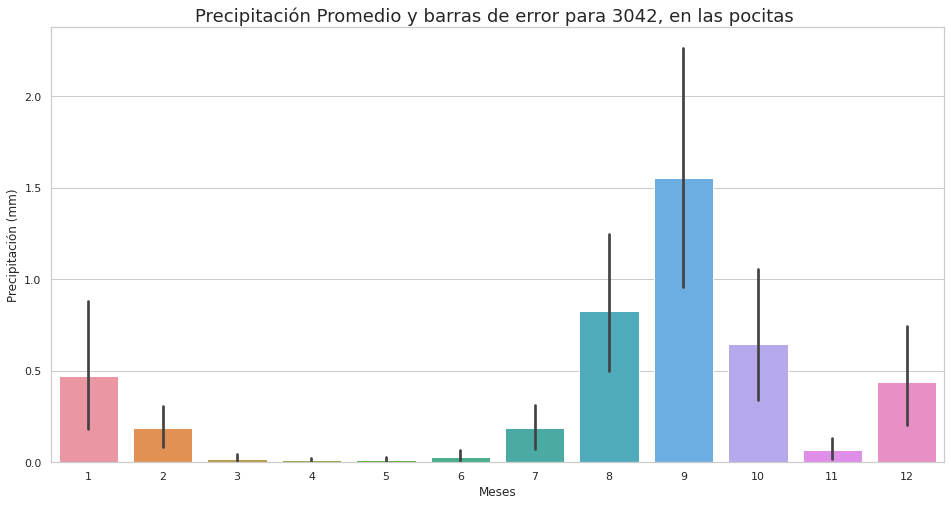

In [13]:
# Gráfica de Precipitación últimos 31 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precip', data=df_33);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para 3042, en las pocitas ', fontsize=18)

plt.show()

**ACTIVIDAD 2 **










Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

Variación ºC TMax promedio 1984-2017 : 30.422810251009302


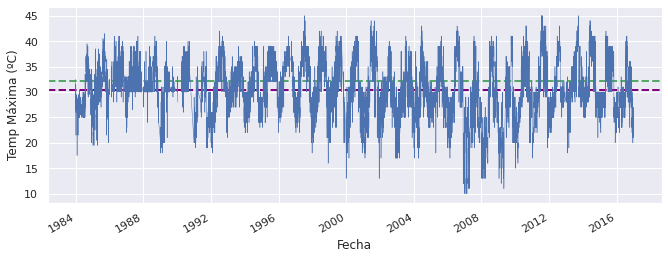

In [16]:
#Graficamos la TMax de los últimos 33 años (1984 hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_33 = df_33.TMax.mean()
Tmax_ave_32 = df_32.TMax.mean()
plt.axhline(Tmax_ave_33, color = 'purple', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_32, color = 'g', linestyle='--', linewidth=2);
df_33['TMax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC TMax promedio 1984-2017 :', Tmax_ave_33)

Variación ºC TMin promedio 1984-2017 : 13.741856361390507


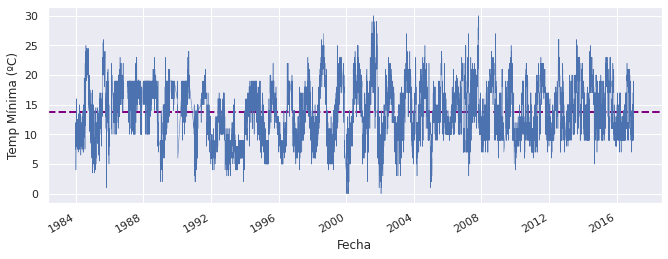

In [18]:
# Graficamos la TMin de los últimos 30 años (1986-hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_33 = df_33.TMin.mean()
plt.axhline(Tmin_ave_33, color = 'purple', linestyle='--', linewidth=2);

df_33['TMin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC TMin promedio 1984-2017 :', Tmin_ave_33)

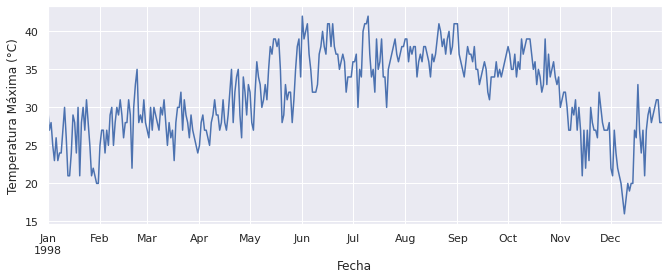

In [19]:
# Analizaremos un año en espeficico de datos, nosotros obtamos por 1998
ax = df_33.loc['1998', 'TMax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

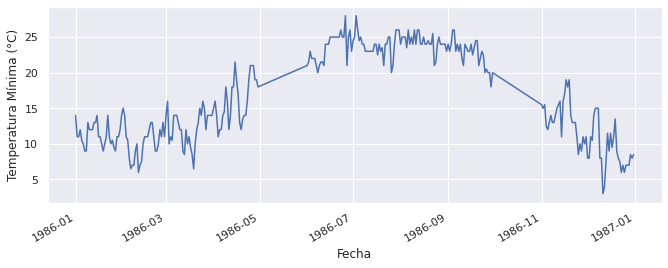

In [ ]:

# Investigando un año de datos
# Nosotros vamos a trabajar con el año de 1986
ax = df_90.loc['1986', 'TMin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

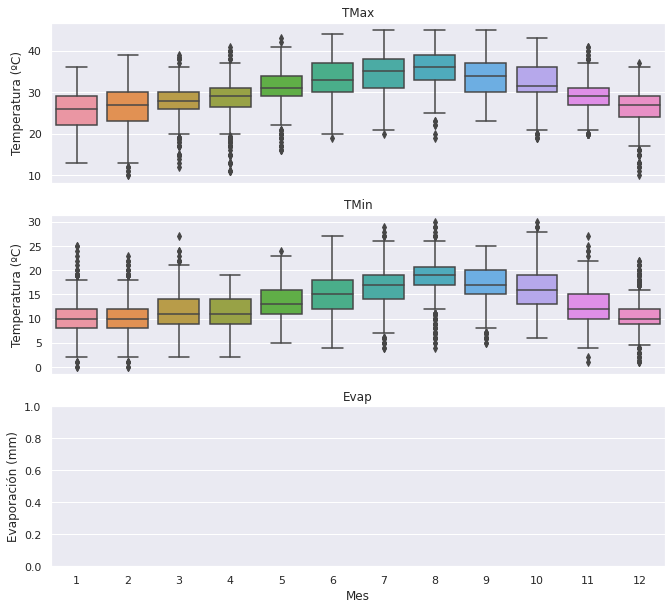

In [20]:
#Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

# Dos gráficas en una Tendremos la grafica de la temperatura minima y maxima 

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_33, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temperatura (ºC)')
  else: 
    ax.set_ylabel('Evaporación (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 3.Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.**

Variación mm Evaporación promedio 1952-1984 : nan


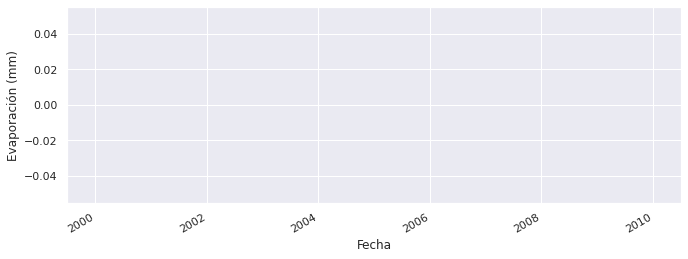

In [21]:
# Graficamos la Evaporación en un tiempo de 33 años (1952 hasta 1884)
sns.set(rc={'figure.figsize':(11, 4)})
Evap_ave_33 = df_32.Evap.mean()
Evap_ave_32 = df_33.Evap.mean()
plt.axhline(Evap_ave_33, color = 'purple', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_32, color = 'g', linestyle='--', linewidth=2);
df_33['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
print('Variación mm Evaporación promedio 1952-1984 :', Evap_ave_33)

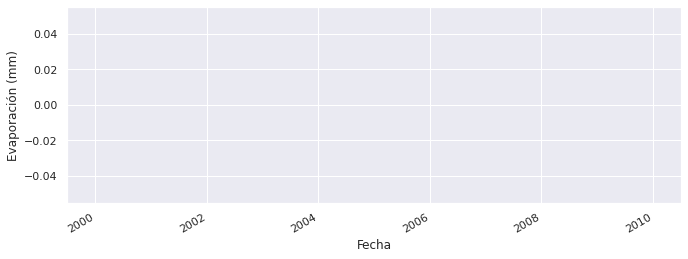

In [22]:
# INVESTIGANDO UN RANGO DE DATOS EVAPORACION
ax = df_33.loc['1987':'1993', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

Actividad 4.  Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). 

In [24]:
# Suavizando la curva de TMax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'TMax', 'TMin']
df_33_7d = df_33[data_cols].rolling(7, center=True,min_periods=1).mean()
df_33_30d = df_33[data_cols].rolling(30, center=True, min_periods=1).mean()
df_33_365d = df_33[data_cols].rolling(365, center=True, min_periods=1).mean()

df_33_365d

,Evap,TMax,TMin
Fecha,,,
1984-01-01,NaN,26.923497,10.117486
1984-01-02,NaN,26.921196,10.135870
1984-01-03,NaN,26.929730,10.137838
1984-01-04,NaN,26.932796,10.177419
1984-01-05,NaN,26.927807,10.227273
...,...,...,...
2016-12-27,NaN,30.689840,14.417112
2016-12-28,NaN,30.720430,14.446237
2016-12-29,NaN,30.740541,14.475676


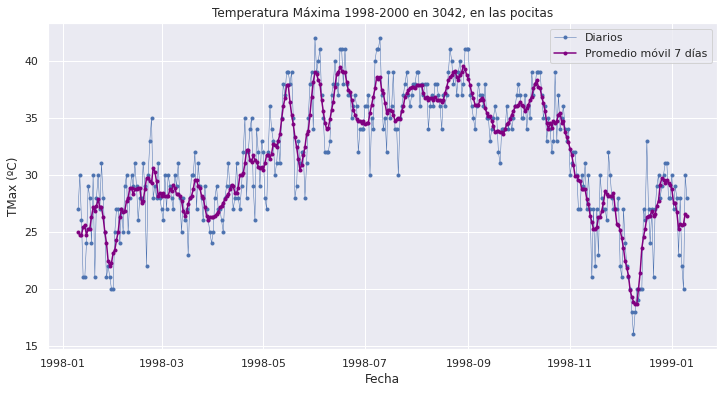

In [25]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_33_7d.loc[start:end, 'TMax'], marker='.', color = "purple" , linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 1998-2000 en 3042, en las pocitas')
ax.legend();

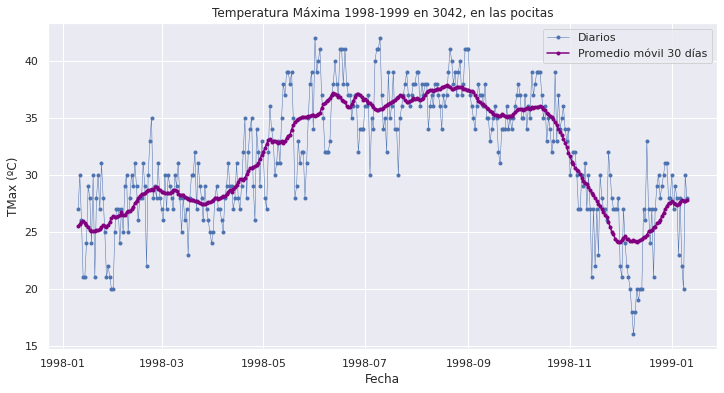

In [27]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_33_30d.loc[start:end, 'TMax'], marker='.', color = "purple" , linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 1998-1999 en 3042, en las pocitas')
ax.legend();

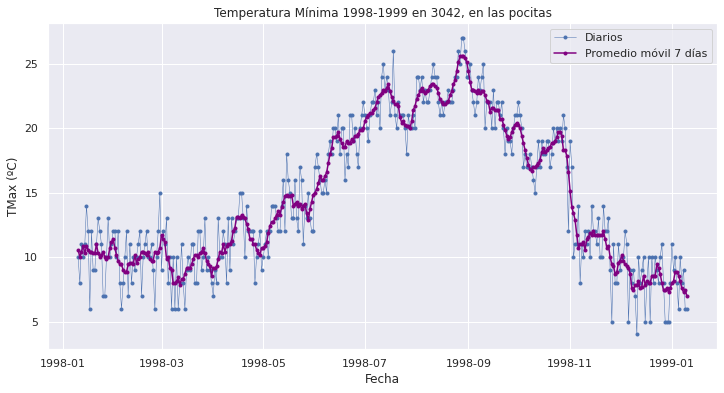

In [28]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_33_7d.loc[start:end, 'TMin'], marker='.', color = "purple", linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 1998-1999 en 3042, en las pocitas')
ax.legend();

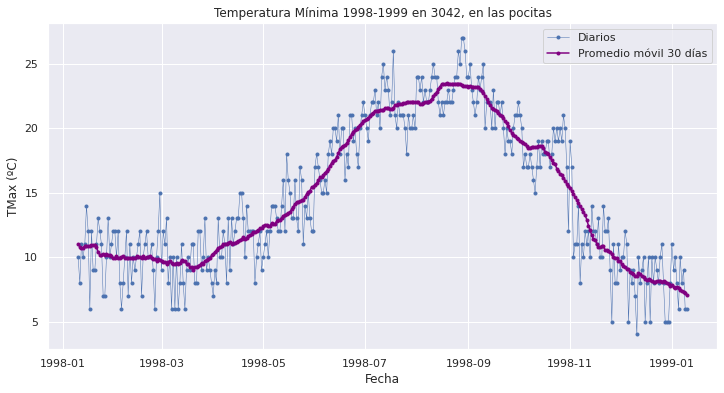

In [29]:
# periodo de intervalo en el cual nos centraremos para investigar
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_33_30d.loc[start:end, 'TMin'], marker='.', color = "purple" ,linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 1998-1999 en 3042, en las pocitas')
ax.legend();

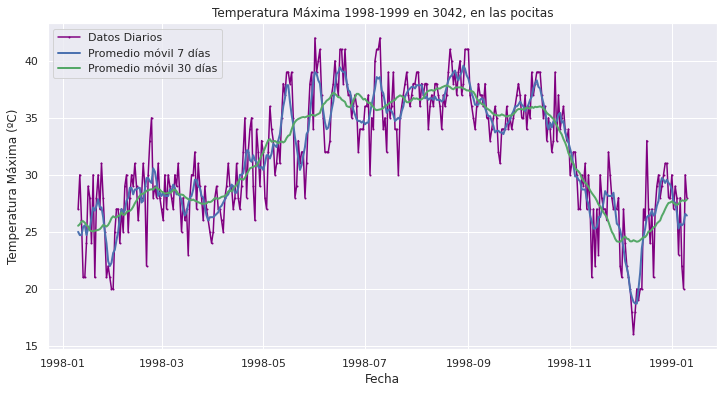

In [30]:
# Intervalos de tiempo en los cuales trabajaremos 
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_7d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_33_30d.loc[start:end, 'TMax'], linestyle='-', color= 'g', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 1998-1999 en 3042, en las pocitas')
ax.legend();

Text(0.5, 1.0, 'Temperatura Mínima 1998-1999 en 3042, en las pocitas')

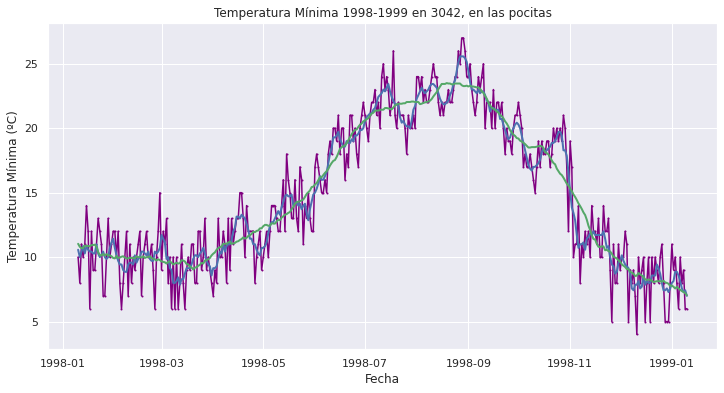

In [31]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_7d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_33_30d.loc[start:end, 'TMin'], linestyle='-', color= 'g', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 1998-1999 en 3042, en las pocitas')

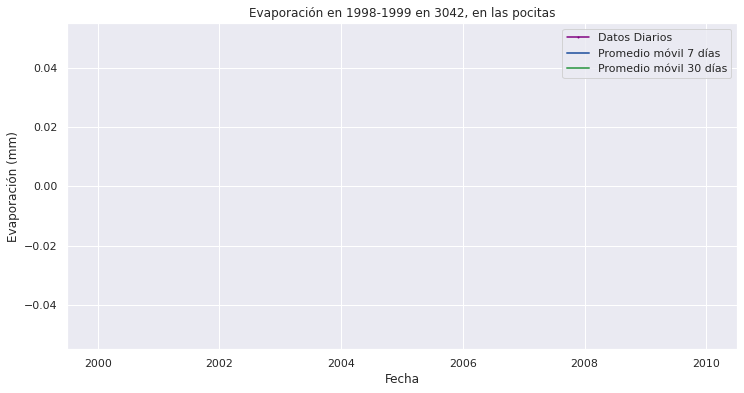

In [32]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1998-01-10', '1999-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_7d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_33_30d.loc[start:end, 'Evap'], linestyle='-', color= 'g', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación en 1998-1999 en 3042, en las pocitas')
ax.legend();

In [ ]:
#Exploraremos para 10 años o mas de datos

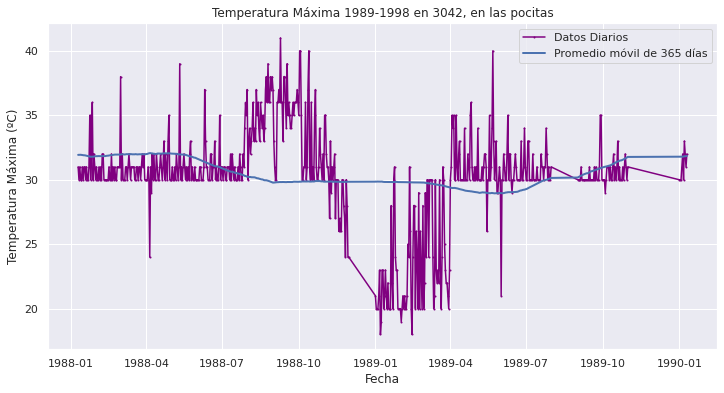

In [38]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1988-01-10', '1990-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_365d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 1989-1998 en 3042, en las pocitas')
ax.legend();

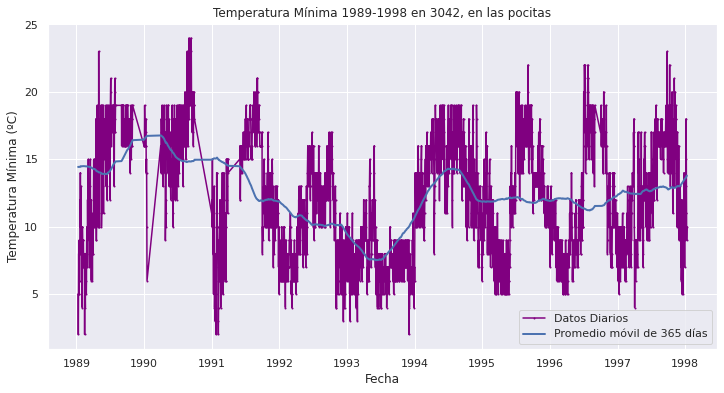

In [34]:
#Realizamos el mismo procedimiento pero ahora para la temperatura minima 

# Fechas de inicio y fin, para filtrar la información
start, end = '1989-01-10', '1998-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_365d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 1989-1998 en 3042, en las pocitas')
ax.legend();

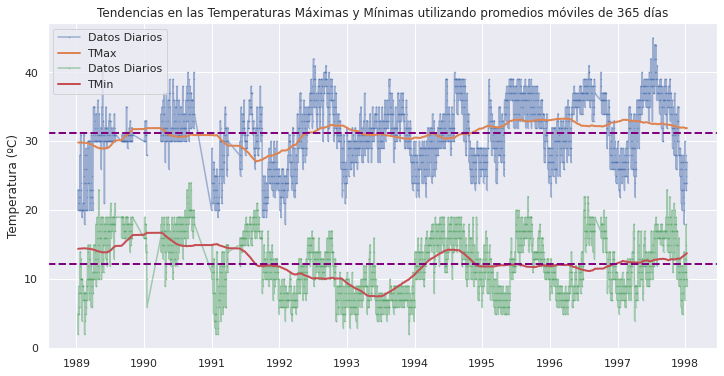

In [36]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1989-01-10', '1998-01-10'

fig, ax = plt.subplots()
for nm in ['TMax', 'TMin']:
    ax.plot(df_33.loc[start:end, nm], marker='.', markersize=1 , linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_33_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_33.loc[start:end, nm].mean(), color = 'purple', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Máximas y Mínimas utilizando promedios móviles de 365 días');

In [37]:
# Repetiremos los mismos procedimientos pero para la evaporacion


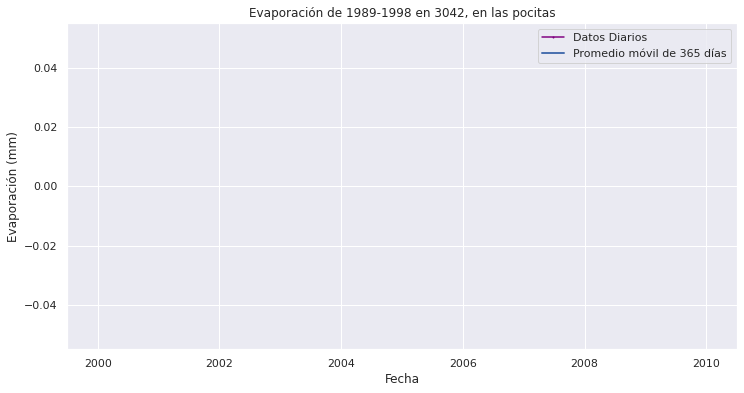

In [39]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1989-01-10', '1998-01-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_33.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='purple',label='Datos Diarios')
ax.plot(df_33_365d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación de 1989-1998 en 3042, en las pocitas')
ax.legend();

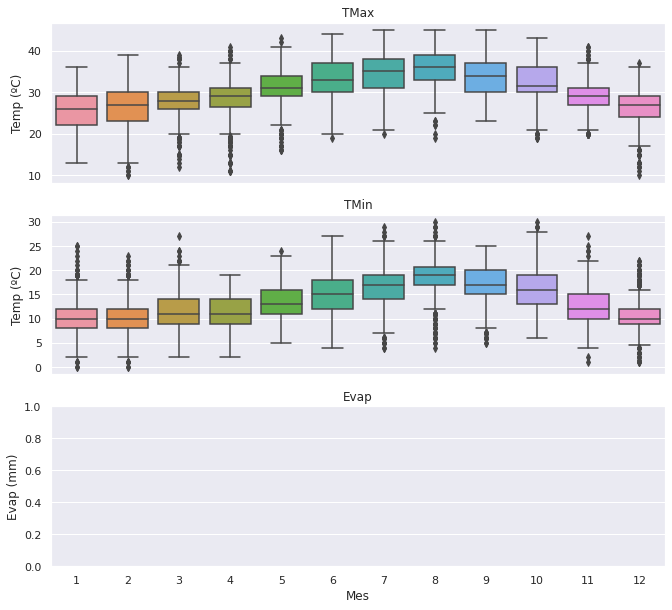

In [40]:
# Analizando Estacionalidad de los datos
# Un proceso similar a los anteriores 
# Tendremos las graficas de temperatura maxima, minima y evaporacion 
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_33, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 5. Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.**

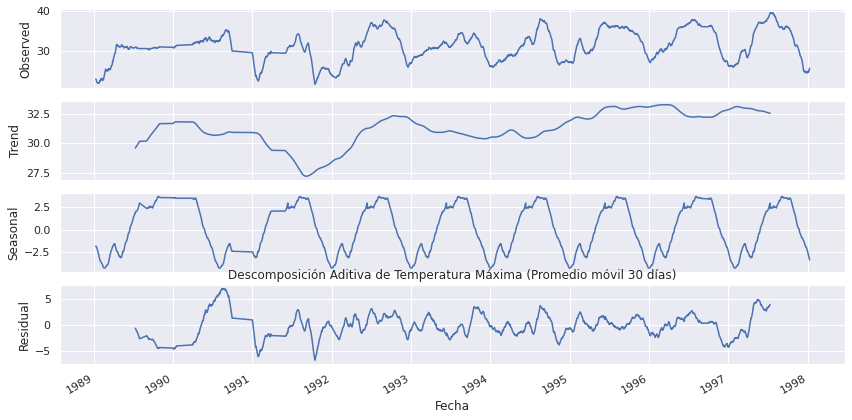

In [41]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01-10', '1998-01-10'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_33_30d.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Promedio móvil 30 días)');

count    2576.000000
mean       31.303724
std         1.475974
min        27.120548
25%        30.624658
50%        31.268493
75%        32.444521
max        33.312329
Name: TMax, dtype: float64

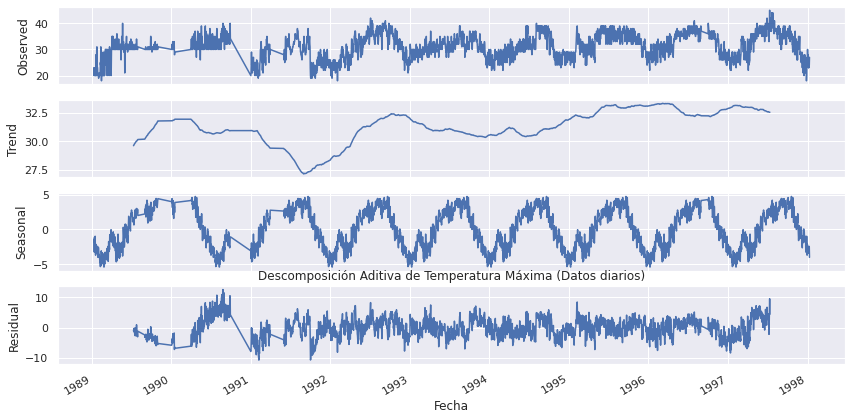

In [42]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01-10', '1998-01-10'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_33.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Datos diarios)');

resTmax.trend.describe()

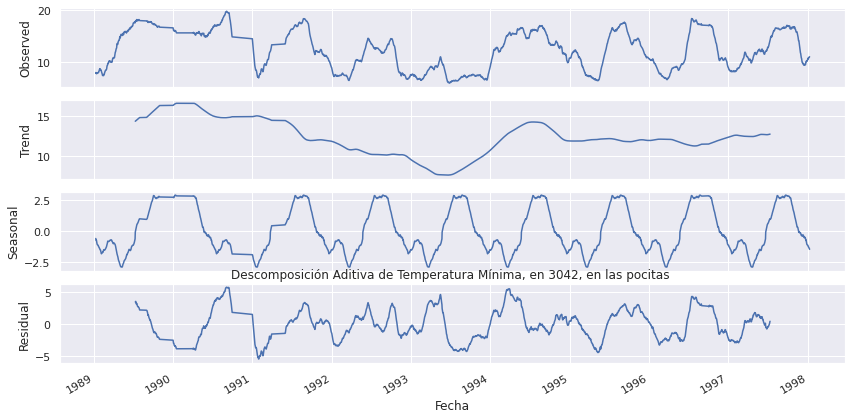

In [43]:
# Ahora con la temperatura minima 

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01-10', '1998-01-10'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_33_30d.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima, en 3042, en las pocitas ');

count    2576.000000
mean       11.988445
std         2.054425
min         7.534338
25%        10.793447
50%        11.987717
75%        12.967580
max        16.663653
Name: TMin, dtype: float64

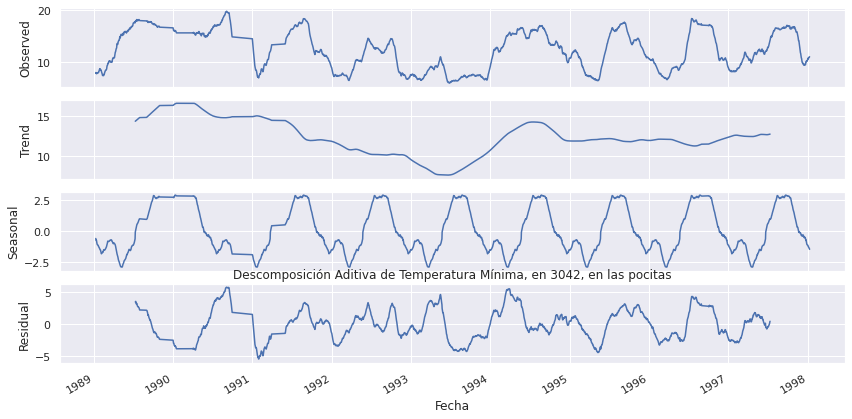

In [44]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01-10', '1998-01-10'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_33_30d.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima, en 3042, en las pocitas');


resTmin.trend.describe()

Actividad 6. Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

 

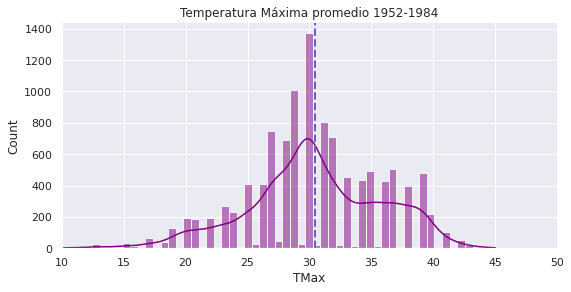

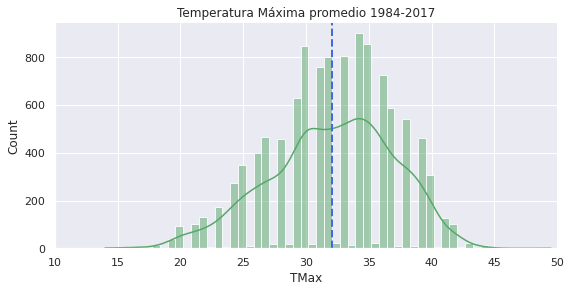

Temperatura máxima promedio del periodo 1952-1984 =  32.08193808882907 ºC
Temperatura máxima promedio del periodo 1984-2017 =  30.422810251009302 ºC
Distribución de la Temperatura Máxima del periodo 1952- 1984 =  4.954729499467451 ºC
Distribución de la Temperatura Máxima del periodo 1984- 2017 =  5.43753466694802 ºC


In [54]:

# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_33.TMax, kde=True, color='purple', height=4, aspect=2);
plt.axvline(df_33.TMax.mean(), linestyle='--', linewidth=2, color='slateblue');

g2 = sns.displot(df_32.TMax, kde=True, color='g', height=4, aspect=2);
plt.axvline(df_32.TMax.mean(), linestyle='--', linewidth=2, color='royalblue');


g1.set(title='Temperatura Máxima promedio 1952-1984');
g2.set(title='Temperatura Máxima promedio 1984-2017');


g1.set(xlim=(10,50))
g2.set(xlim=(10,50))



plt.show();
print('Temperatura máxima promedio del periodo 1952-1984 = ', df_32.TMax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1984-2017 = ', df_33.TMax.mean(), 'ºC' )


print('Distribución de la Temperatura Máxima del periodo 1952- 1984 = ', df_32.TMax.std(), 'ºC' )
print('Distribución de la Temperatura Máxima del periodo 1984- 2017 = ', df_33.TMax.std(), 'ºC' )


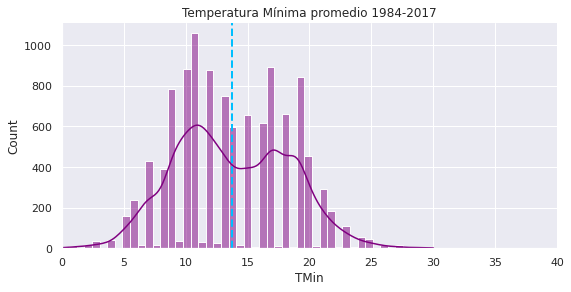

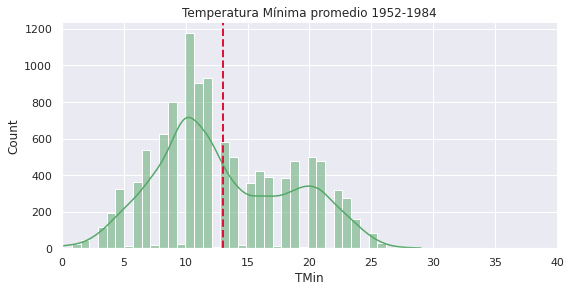

Temperatura mínima promedio del periodo 1984-2017 =  13.741856361390507 ºC
Temperatura mínima promedio del periodo 1952-1984 =  13.004307250538407 ºC
Distribución de la Temperatura Mínima del periodo 1984-2017 =  4.618124833049322 ºC
Distribución de la Temperatura Mínima del periodo 1952-1984 =  5.459914813478087 ºC


In [53]:
# Hacemos el mismo procedimiento para la temperatura minima 

g1 = sns.displot(df_33.TMin, kde=True, color='purple', height=4, aspect=2);
plt.axvline(df_33.TMin.mean(), linestyle='--', linewidth=2, color='deepskyblue');

g2 = sns.displot(df_32.TMin, kde=True, color='g', height=4, aspect=2);
plt.axvline(df_32.TMin.mean(), linestyle='--', linewidth=2, color='crimson');



g1.set(title='Temperatura Mínima promedio 1984-2017');
g2.set(title='Temperatura Mínima promedio 1952-1984');

g1.set(xlim=(0,40))
g2.set(xlim=(0,40))


plt.show();

print('Temperatura mínima promedio del periodo 1984-2017 = ', df_33.TMin.mean(), 'ºC' )
print('Temperatura mínima promedio del periodo 1952-1984 = ', df_32.TMin.mean(), 'ºC' )


print('Distribución de la Temperatura Mínima del periodo 1984-2017 = ', df_33.TMin.std(), 'ºC' )
print('Distribución de la Temperatura Mínima del periodo 1952-1984 = ', df_32.TMin.std(), 'ºC' )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


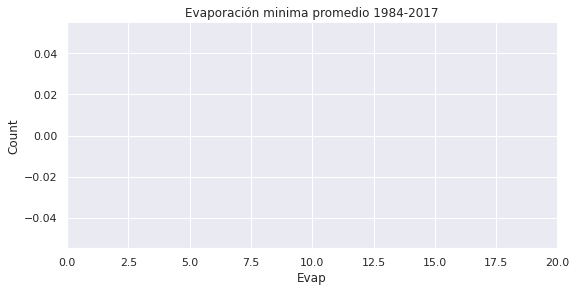

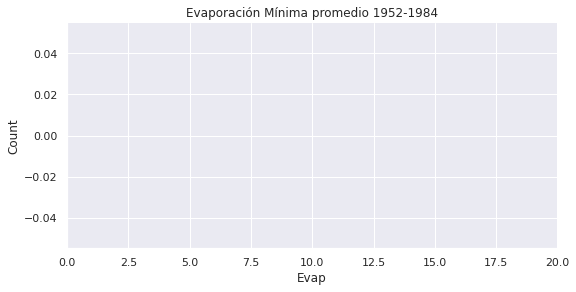

Evaporación promedio del periodo 1984-2017 =  nan mm
Evaporación promedio del periodo 1952-1984 =  nan mm
Distribución de la Evaporación del periodo 1984-2017 =  nan mm
Distribución de la Evaporación del periodo 1952-1984 =  nan mm


In [55]:
# Por ultimo se repitira el proceso para la evaporacion

g1 = sns.displot(df_33.Evap, kde=True, color='purple', height=4, aspect=2);
plt.axvline(df_33.Evap.mean(), linestyle='--', linewidth=2, color='dodgerblue');

g2 = sns.displot(df_32.Evap, kde=True, color='g', height=4, aspect=2);
plt.axvline(df_32.Evap.mean(), linestyle='--', linewidth=2, color='navy');


g1.set(title='Evaporación minima promedio 1984-2017');
g2.set(title='Evaporación Mínima promedio 1952-1984');



g1.set(xlim=(0,20))
g2.set(xlim=(0,20))


plt.show();

print('Evaporación promedio del periodo 1984-2017 = ', df_33.Evap.mean(), 'mm' )
print('Evaporación promedio del periodo 1952-1984 = ', df_32.Evap.mean(), 'mm' )


print('Distribución de la Evaporación del periodo 1984-2017 = ', df_33.Evap.std(), 'mm' )
print('Distribución de la Evaporación del periodo 1952-1984 = ', df_32.Evap.std(), 'mm' )
